<a 
href="https://colab.research.google.com/github/adilo231/Python-for-machine-learning/blob/main/Exercices Global/Stroke prediction project.ipynb" 
target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stroke Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Exploratory Data Analysis
## Analyse de la forme des données

- **variable target** : stroke
- **lignes et colonnes** : 5110, 12
- **types de variables** : qualitatives : 5, quantitatives : 7
- **Analyse des valeurs manquantes** : peut de valeurs NaN 3% de la colone bmi

In [2]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [29]:
df=dataset.copy()
df.shape


(5110, 12)

object     5
int64      4
float64    3
dtype: int64

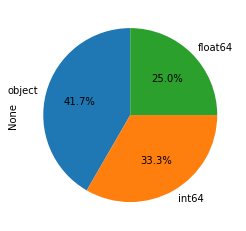

In [4]:
df.dtypes.value_counts().plot.pie(autopct='%1.1f%%',startangle=90)
df.dtypes.value_counts()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**There are null values present in 'bmi'.**

In [6]:
df.isna().sum()/dataset.shape[0]*100

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

seulement 3% des données «bmi» manquent. Nous avons remplacé les valeurs nulles de 'bmi' par la moyenne dans cette colonne.

In [8]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


# Data Visualization

### Heat Map Correlation

<AxesSubplot:>

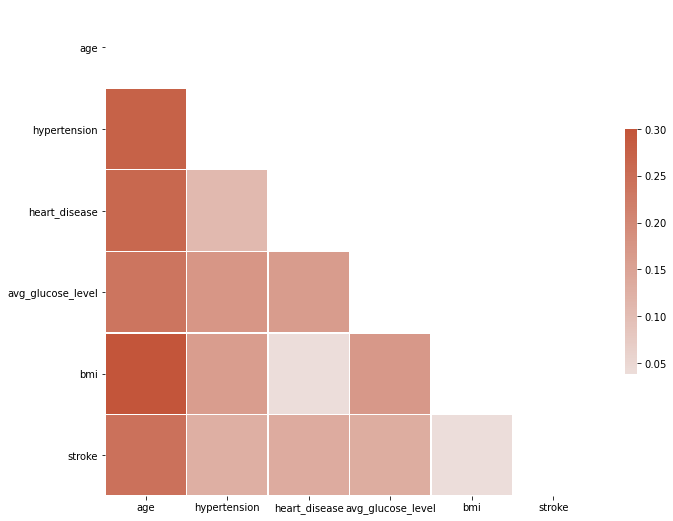

In [12]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Count Plot

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


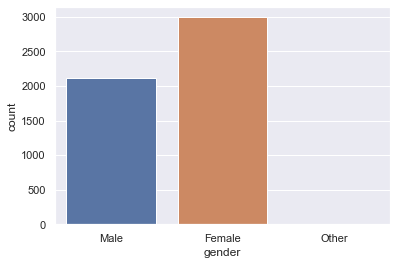

In [13]:
print(df.gender.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df, x="gender")
plt.show()

0    4612
1     498
Name: hypertension, dtype: int64


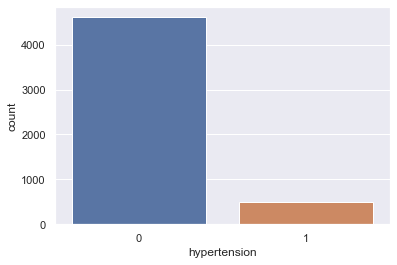

In [14]:
print(df.hypertension.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df, x="hypertension")
plt.show()

Yes    3353
No     1757
Name: ever_married, dtype: int64


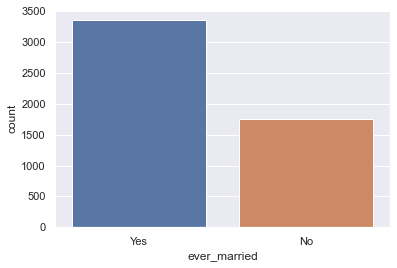

In [15]:
print(df.ever_married.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df, x="ever_married")
plt.show()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


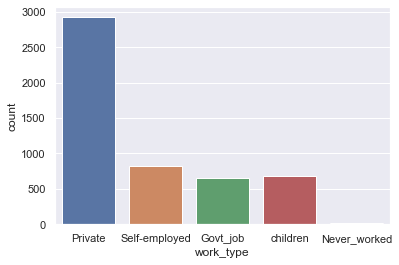

In [16]:
print(df.work_type.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df, x="work_type")
plt.show()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


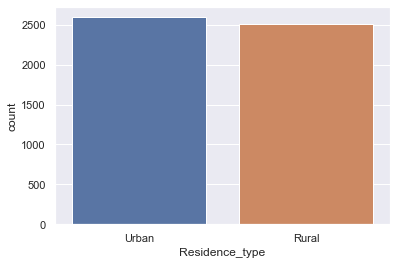

In [17]:
print(df.Residence_type.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df, x="Residence_type")
plt.show()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


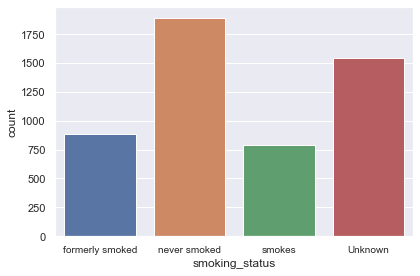

In [18]:
print(df.smoking_status.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df, x="smoking_status")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.show()

0    4861
1     249
Name: stroke, dtype: int64


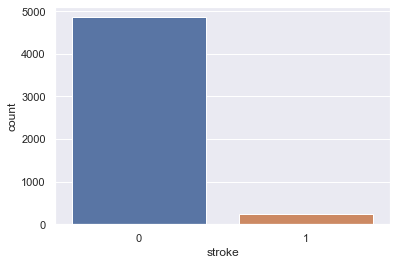

In [19]:
print(df.stroke.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df, x="stroke")
plt.show()

    - Ci-dessus, vous pouvez voir que les femelles présentes dans notre ensemble de données sont plus élevées que les mâles.
    - D'en haut, cela montre que moins de personnes souffrent d'hypertension.
    - Le ratio vu d'en haut est d'environ 2: 1 pour être marié.
    - Beaucoup de gens travaillent dans le secteur privé.
    Le type de résidence est le même pour les personnes présentes dans notre jeu de données.
    - Beaucoup de gens n'ont jamais fumé de leur vie. Mais nous ne connaissons pas non plus le statut exact des inconnus dans notre ensemble de données.
    -D e la variable dépendante ci-dessus, nous avons vraiment moins de personnes qui ont subi un AVC. Mais cela signifie également que notre ensemble de données est déséquilibré. Nous devons probablement utiliser des techniques d'échantillonnage pour équilibrer les données.
    - Mais, commençons par tracer davantage pour voir comment nos données fonctionnent dans cet état.

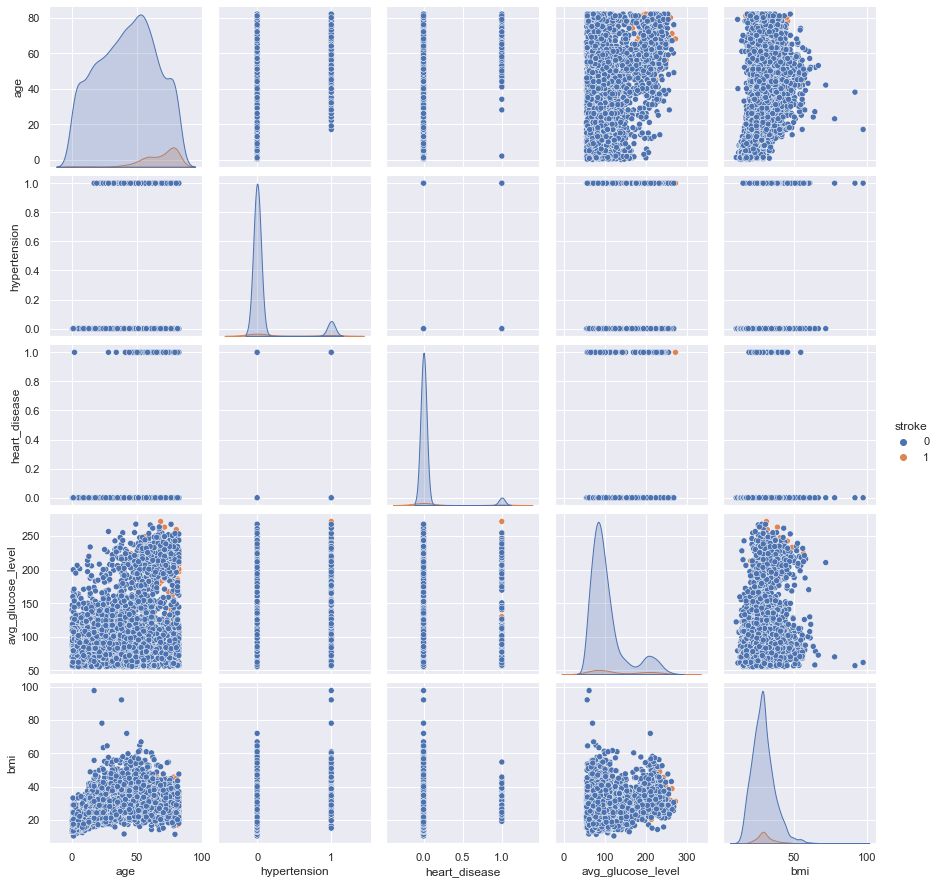

In [20]:
sns.pairplot(df,hue='stroke')

## **Distribution Plot** <a id="3.3"></a>

### **Avg. Glucose Level** <a id="3.3.1"></a>

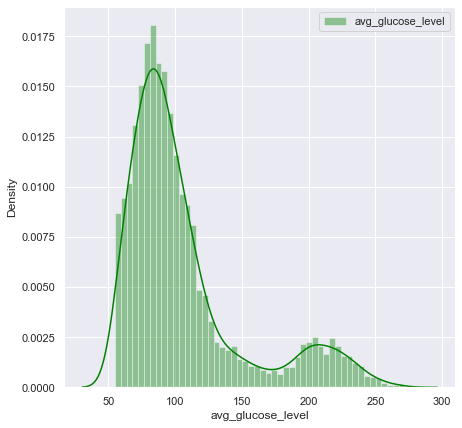

In [21]:
fig = plt.figure(figsize=(7,7))
sns.distplot(df.avg_glucose_level, color="green", label="avg_glucose_level", kde= True)
plt.legend()

1. Les taux de glucose normaux chez les adultes devraient se situer autour de 80-140. Par conséquent, la densité est plus élevée autour de cette plage. Ainsi, nous pouvons voir que nous avons beaucoup de gens qui ont un taux de glucose normal, donc ils ne souffrent pas de diabète.
2. La gamme 140-200 peut être considérée comme du pré-diabète. Mais, en regardant le graphique, nous pouvons voir que moins de personnes sont dans la zone de pré-diabète.
3. Tout ce qui dépasse 200 peut indiquer que la personne souffre de diabète. La densité est supérieure à celle du pré-diabète en regardant le graphique.

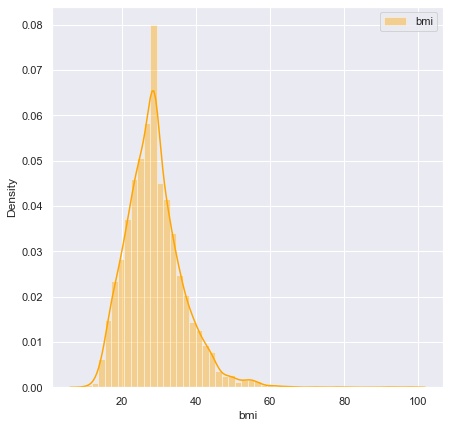

In [22]:
fig = plt.figure(figsize=(7,7))
sns.distplot(df.bmi, color="orange", label="bmi", kde= True)
plt.legend()

1. Un IMC inférieur à 19 peut être considéré comme un poids insuffisant. En regardant notre graphique, peu de personnes souffrent d'insuffisance pondérale.

2. Un IMC entre 19 et 25 peut être considéré comme un poids normal. Nous avons une quantité relativement bonne de personnes qui ont un poids normal.

3. Un IMC supérieur à 25 peut être considéré comme la personne est probablement en surpoids ou obèse. Notre graphique montre que la densité est plus élevée autour de ces IMC.

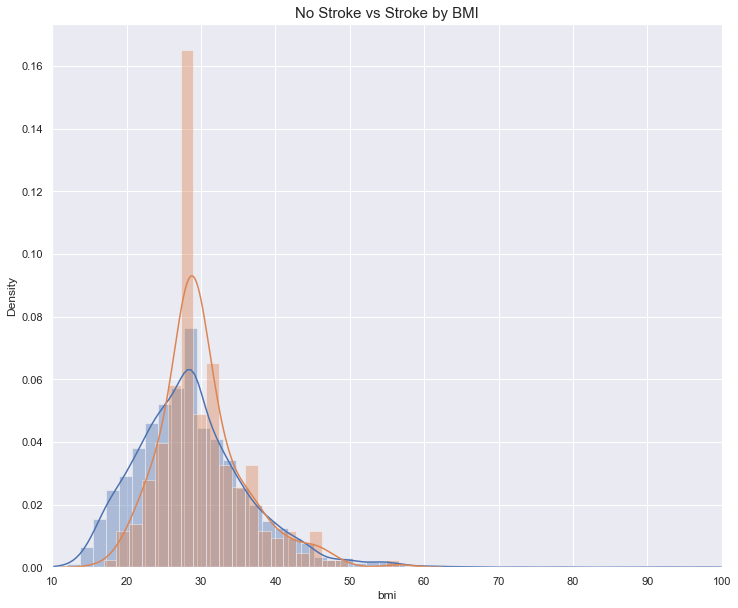

In [23]:
plt.figure(figsize=(12,10))

sns.distplot(df[df['stroke'] == 0]["bmi"]) 
sns.distplot(df[df['stroke'] == 1]["bmi"]) 

plt.title('No Stroke vs Stroke by BMI', fontsize=15)
plt.xlim([10,100])
plt.show()

D'après le graphique, il montre que la densité de personnes en surpoids ayant subi un AVC est supérieure.

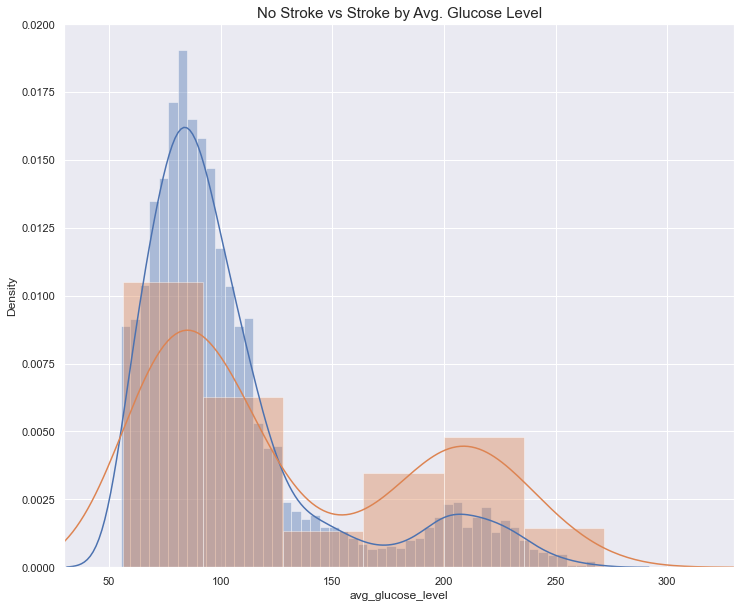

In [24]:
plt.figure(figsize=(12,10))

sns.distplot(df[df['stroke'] == 0]["avg_glucose_level"]) 
sns.distplot(df[df['stroke'] == 1]["avg_glucose_level"], )

plt.title('No Stroke vs Stroke by Avg. Glucose Level', fontsize=15)
plt.xlim([30,330])
plt.show()

D'après le graphique, il montre que la densité de personnes ayant un taux de glucose inférieur à 100 a subi davantage d'accidents vasculaires cérébraux.

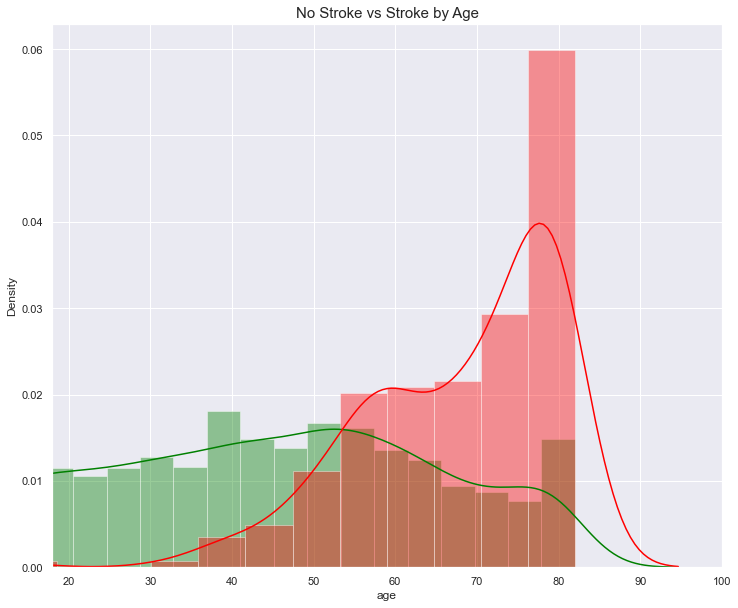

In [25]:
plt.figure(figsize=(12,10))

sns.distplot(df[df['stroke'] == 0]["age"], color='green') # No Stroke - green
sns.distplot(df[df['stroke'] == 1]["age"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Age', fontsize=15)
plt.xlim([18,100])
plt.show()

D'après le graphique, on peut voir que la densité des personnes âgées de plus de 50 ans a davantage subi d'AVC.

## **Scatter Plot** <a id="3.4"></a>

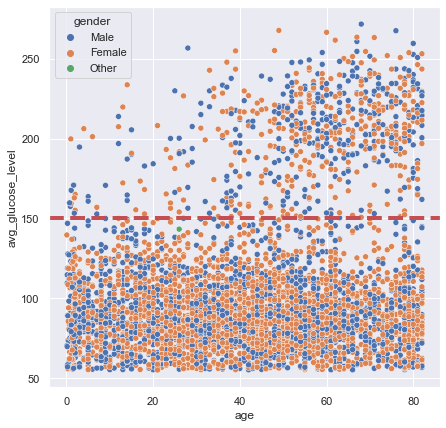

In [26]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=df, x="age", y="avg_glucose_level", hue='gender')
graph.axhline(y= 150, linewidth=4, color='r', linestyle= '--')
plt.show()

D'après le graphique ci-dessus, nous pouvons voir que les personnes ayant un taux de glucose supérieur à 150 sont relativement moins nombreuses que celles ci-dessous. Ainsi, nous pouvons dire que les personnes de plus de 150 ans pourraient souffrir de diabète.

## **Violin Plot** <a id="3.5"></a>

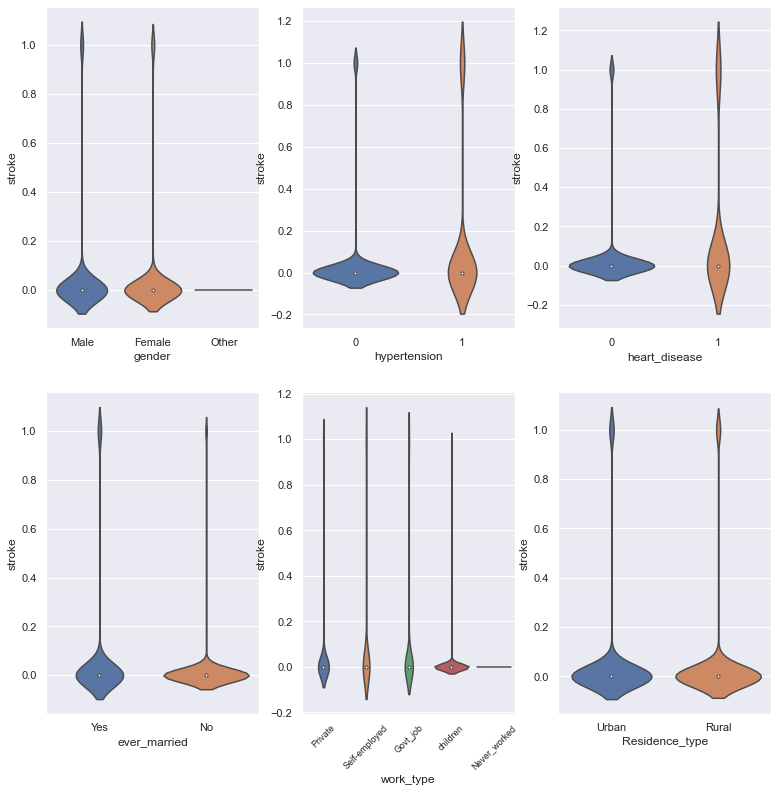

In [27]:
plt.figure(figsize=(13,13))
sns.set_theme(style="darkgrid")
plt.subplot(2,3,1)
sns.violinplot(x = 'gender', y = 'stroke', data = df)
plt.subplot(2,3,2)
sns.violinplot(x = 'hypertension', y = 'stroke', data = df)
plt.subplot(2,3,3)
sns.violinplot(x = 'heart_disease', y = 'stroke', data = df)
plt.subplot(2,3,4)
sns.violinplot(x = 'ever_married', y = 'stroke', data = df)
plt.subplot(2,3,5)
sns.violinplot(x = 'work_type', y = 'stroke', data = df)
plt.xticks(fontsize=9, rotation=45)
plt.subplot(2,3,6)
sns.violinplot(x = 'Residence_type', y = 'stroke', data = df)
plt.show()

# Preparation de donnees

In [30]:
df =dataset.copy()
df =df.drop('id',1)
df.bmi.replace(to_replace=np.nan, value=dataset.bmi.mean(), inplace=True)
df = df.drop(df[df['gender']=='Other'].index,  0)
y = df.pop('stroke')
X = df
num_col = X.select_dtypes(exclude=['object']).columns
cat_col = X.select_dtypes(include=['object']).columns

In [31]:
numerical_pipline = make_pipeline(SimpleImputer(), StandardScaler())
categorical_pipline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

In [32]:
preprocessor = make_column_transformer((numerical_pipline, num_col),
                                      (categorical_pipline, cat_col))
X_transformed=preprocessor.fit_transform(X)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X_transformed, y, test_size= 0.2, random_state= 0)
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (4087, 20)
Number transactions y_train dataset:  (4087,)
Number transactions x_test dataset:  (1022, 20)
Number transactions y_test dataset:  (1022,)


In [34]:

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 195
Before OverSampling, counts of label '0': 3892 

After OverSampling, the shape of train_X: (7784, 20)
After OverSampling, the shape of train_y: (7784,) 

After OverSampling, counts of label '1': 3892
After OverSampling, counts of label '0': 3892


#  Selection des modeles <a id="9"></a>

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [35]:
from tqdm import tqdm
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['XGBoost', XGBClassifier(eval_metric= 'error')])

lst_1= []

for m in tqdm(range(len(models))):
    lst_2= []
    model = models[m][1]
    model.fit(x_train_res, y_train_res)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = x_train_res, y = y_train_res, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
 
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

100%|██████████| 8/8 [01:41<00:00, 12.66s/it]


In [36]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])
df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)
df

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
6,Random Forest,93.052838,96.789025,3.368607,0.517447,0.130435,0.055556,0.077922
7,XGBoost,93.052838,95.877583,6.002311,0.561161,0.242424,0.148148,0.183908
5,Decision Tree,88.747554,92.074260,3.526787,0.538434,0.103896,0.148148,0.122137
2,KNeighbors,82.093933,91.251407,0.926424,0.590737,0.109091,0.333333,0.164384
1,SVM,80.724070,87.127720,1.426425,0.662190,0.137056,0.500000,0.215139
0,Logistic Regreesion,76.614481,79.881712,1.677933,0.736666,0.145594,0.703704,0.241270
4,BernoulliNB,61.056751,74.023813,1.340416,0.715737,0.103687,0.833333,0.184426
3,GaussianNB,34.050881,64.080094,1.203498,0.634374,0.071823,0.962963,0.133676


# Réglage des modèles

In [18]:
from sklearn.model_selection import GridSearchCV

*The **GridSearchCV** is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.*

In [39]:
grid_models = [
               (SVC(),[{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[50,100,150,200,250,300],'criterion':['gini','entropy'],'random_state':[0]}]), 
              (XGBClassifier(), [{'learning_rate': [0.01,0.025 ,0.05,0.075, 0.1,0.2,0.3], 'eval_metric': ['error']}])]

In [47]:
models = []
models.append(['SVM', SVC(random_state=0,probability=True)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['XGBoost', XGBClassifier(eval_metric= 'error')])

In [48]:
from sklearn.model_selection import ShuffleSplit,StratifiedKFold
lst_1= []
modeles =[]

k=0
for i,j in tqdm(grid_models):
    lst_2= []
    
    grid = GridSearchCV(estimator=i,param_grid = j,cv = 10)
    grid.fit(x_train_res, y_train_res)
    model = grid.best_estimator_
    y_pred = model.predict(x_test)
   
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = x_train_res, y = y_train_res, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    
    modeles.append(model)
    lst_2.append(models[k][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)
    print(lst_2)
    k+=1


 33%|███▎      | 1/3 [04:26<08:53, 266.84s/it]

['SVM', 80.72407045009786, 87.12771960624492, 1.4264245668782585, 0.6621900826446281, 0.13705583756345177, 0.5, 0.2151394422310757]


 67%|██████▋   | 2/3 [08:03<04:11, 251.72s/it]

['Random Forest', 92.56360078277886, 96.99459791242478, 3.2593573342272135, 0.5061218243036425, 0.07692307692307693, 0.037037037037037035, 0.05]


100%|██████████| 3/3 [09:33<00:00, 191.33s/it]

['XGBoost', 93.05283757338552, 95.877583481558, 6.002311333275979, 0.5611608509335783, 0.24242424242424243, 0.14814814814814814, 0.18390804597701146]


In [42]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])
df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)
df

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
2,XGBoost,93.052838,95.877583,6.002311,0.561161,0.242424,0.148148,0.183908
1,Random Forest,92.563601,96.994598,3.259357,0.506122,0.076923,0.037037,0.050000
0,SVM,80.724070,87.127720,1.426425,0.662190,0.137056,0.500000,0.215139


In [65]:
modeles[3]

RandomForestClassifier(criterion='entropy', n_estimators=250, random_state=0)

*En regardant la sortie après **GridSearch**, nous pouvons déterminer que la **RandomForest** semble la mieux adaptée au modèle.*

# Modèle après réglage des hyperparamètres

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       968
           1       0.24      0.15      0.18        54

    accuracy                           0.93      1022
   macro avg       0.60      0.56      0.57      1022
weighted avg       0.92      0.93      0.92      1022

ROC AUC score: 0.7441460055096418
Accuracy Score:  0.9305283757338552


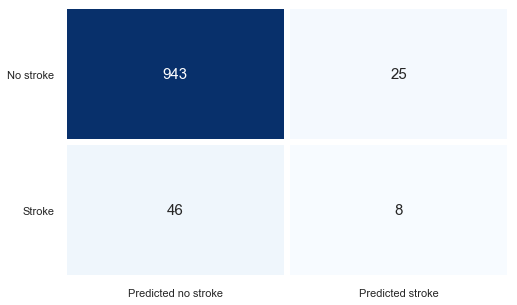

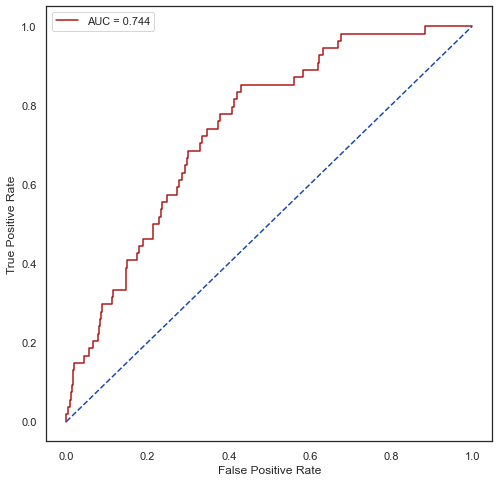

In [43]:
#Fitting RandomForest Model
classifier = modeles[2]
#classifier.fit(x_train_res, y_train_res)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

# Conclusion <a id="13"></a>

Donc, après les multiples visualisations de nos données et en passant par toutes les performances des modèles. J'ajuste les hyperparamètres à l'aide de GridSearch pour obtenir des modèles. Après cela, je suis arrivé à la conclusion que ***RandomForestClassifier*** est le meilleur modèle pour cet ensemble de données.